In [1]:
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Setting the ast_node_interactivity to "all" will print
# each statement, not only the last one of a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
data = load_iris()

#np.concatenate((data.data, data.target.T), axis = 1)
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df["target"] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Why you need Scaling for k-means
(A discussion can be found on [StackOverflow](https://stats.stackexchange.com/questions/21222/are-mean-normalization-and-feature-scaling-needed-for-k-means-clustering)
![alt](kmeans.png "Logo Title Text 1") 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler

scaler = StandardScaler()
minMax = MinMaxScaler()

df_features = df.drop("target", axis = 1)

In [6]:
StandardTransformer = scaler.fit(df_features)
MinMaxTransformer = minMax.fit(df_features)

In [7]:
data.feature_names
colnames = ["scaled " + element for element in data.feature_names]

features_standardScaled = pd.DataFrame(StandardTransformer.transform(df_features), columns=colnames)
features_minMaxScaled = pd.DataFrame(MinMaxTransformer.transform(df_features), columns=colnames)

standardScaled = pd.concat([features_standardScaled, df.target ], axis = 1)
minMaxScaled = pd.concat([features_minMaxScaled, df.target ], axis = 1)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
sns.pairplot(vars = data.feature_names, data=df, hue="target", size=5)
sns.plt.suptitle('NORMAL')
plt.savefig("normal.pdf")
sns.pairplot(vars = colnames, data=standardScaled, hue="target", size=5)
sns.plt.suptitle('STANDARD')
plt.savefig("standard.pdf")
sns.pairplot(vars = colnames, data=minMaxScaled, hue="target", size=5)
sns.plt.suptitle('MINMAX')
plt.savefig("minmax.pdf")

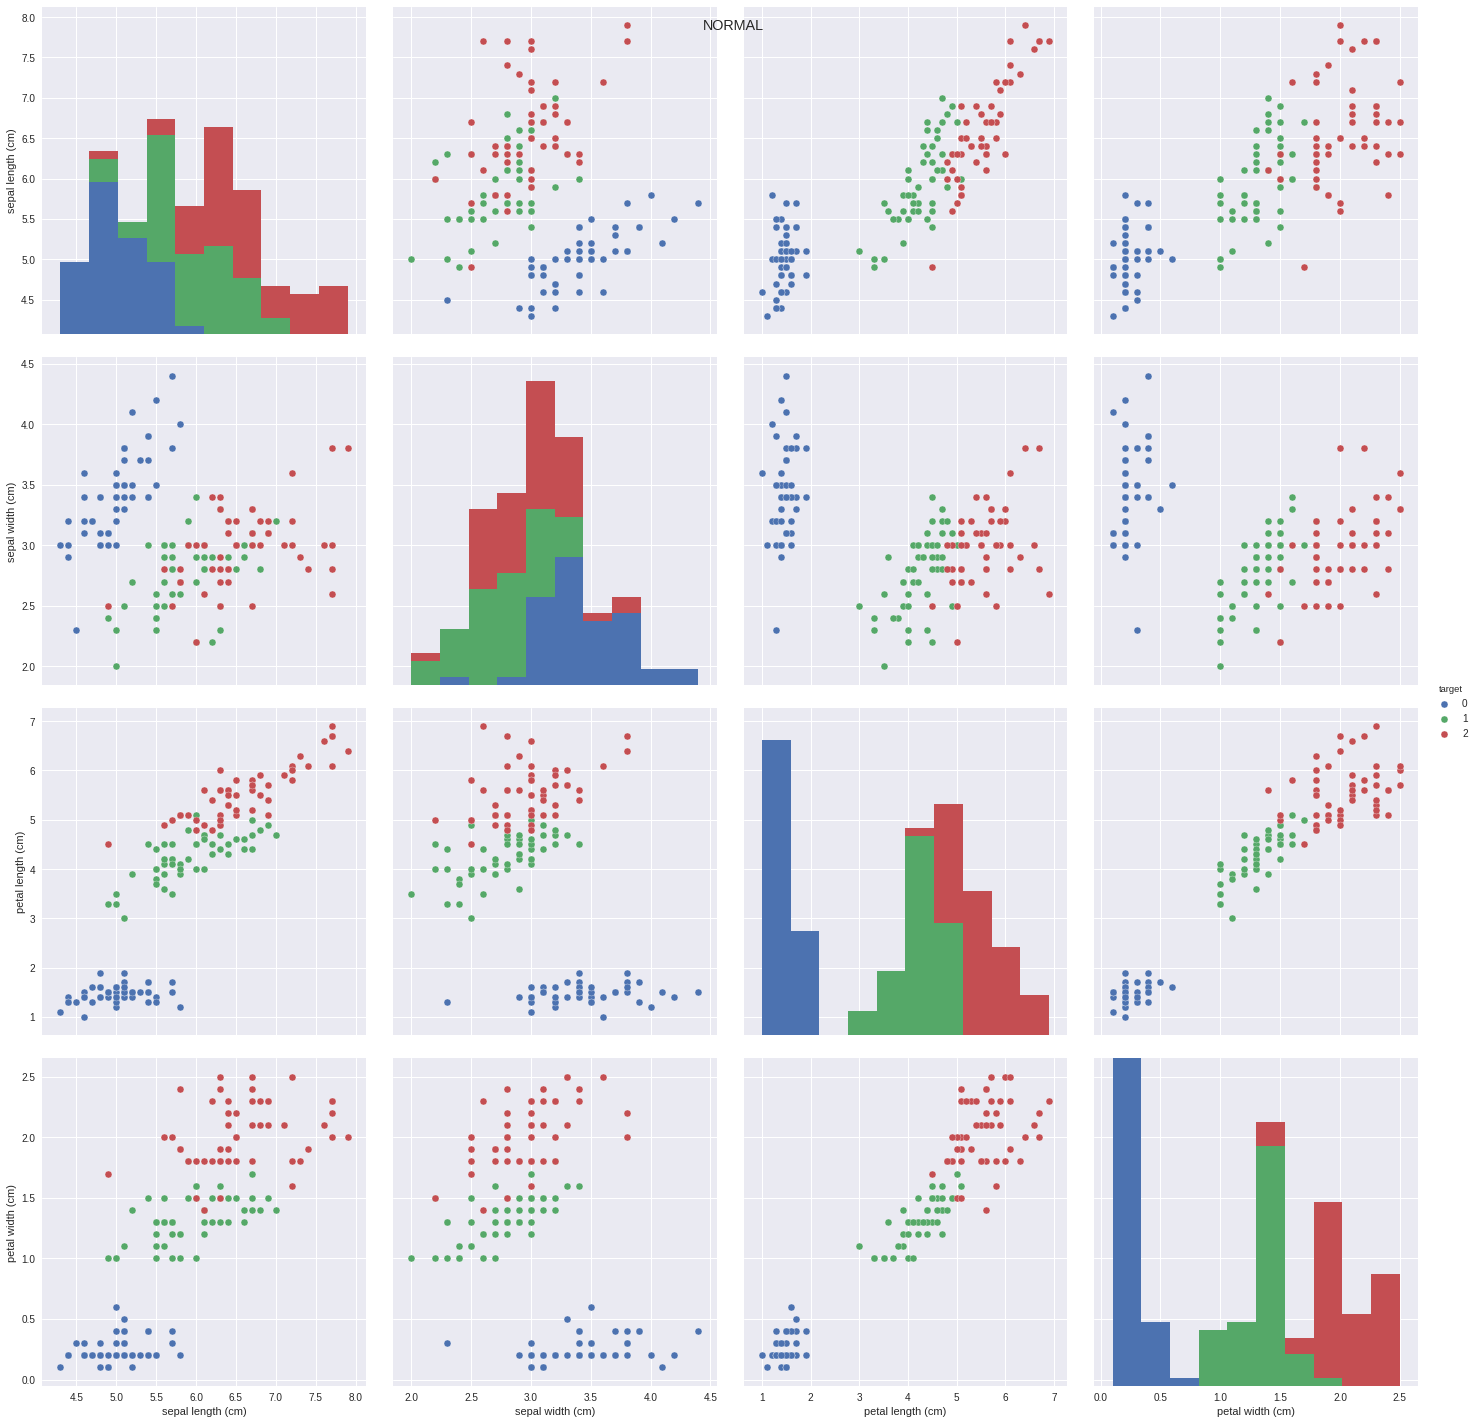

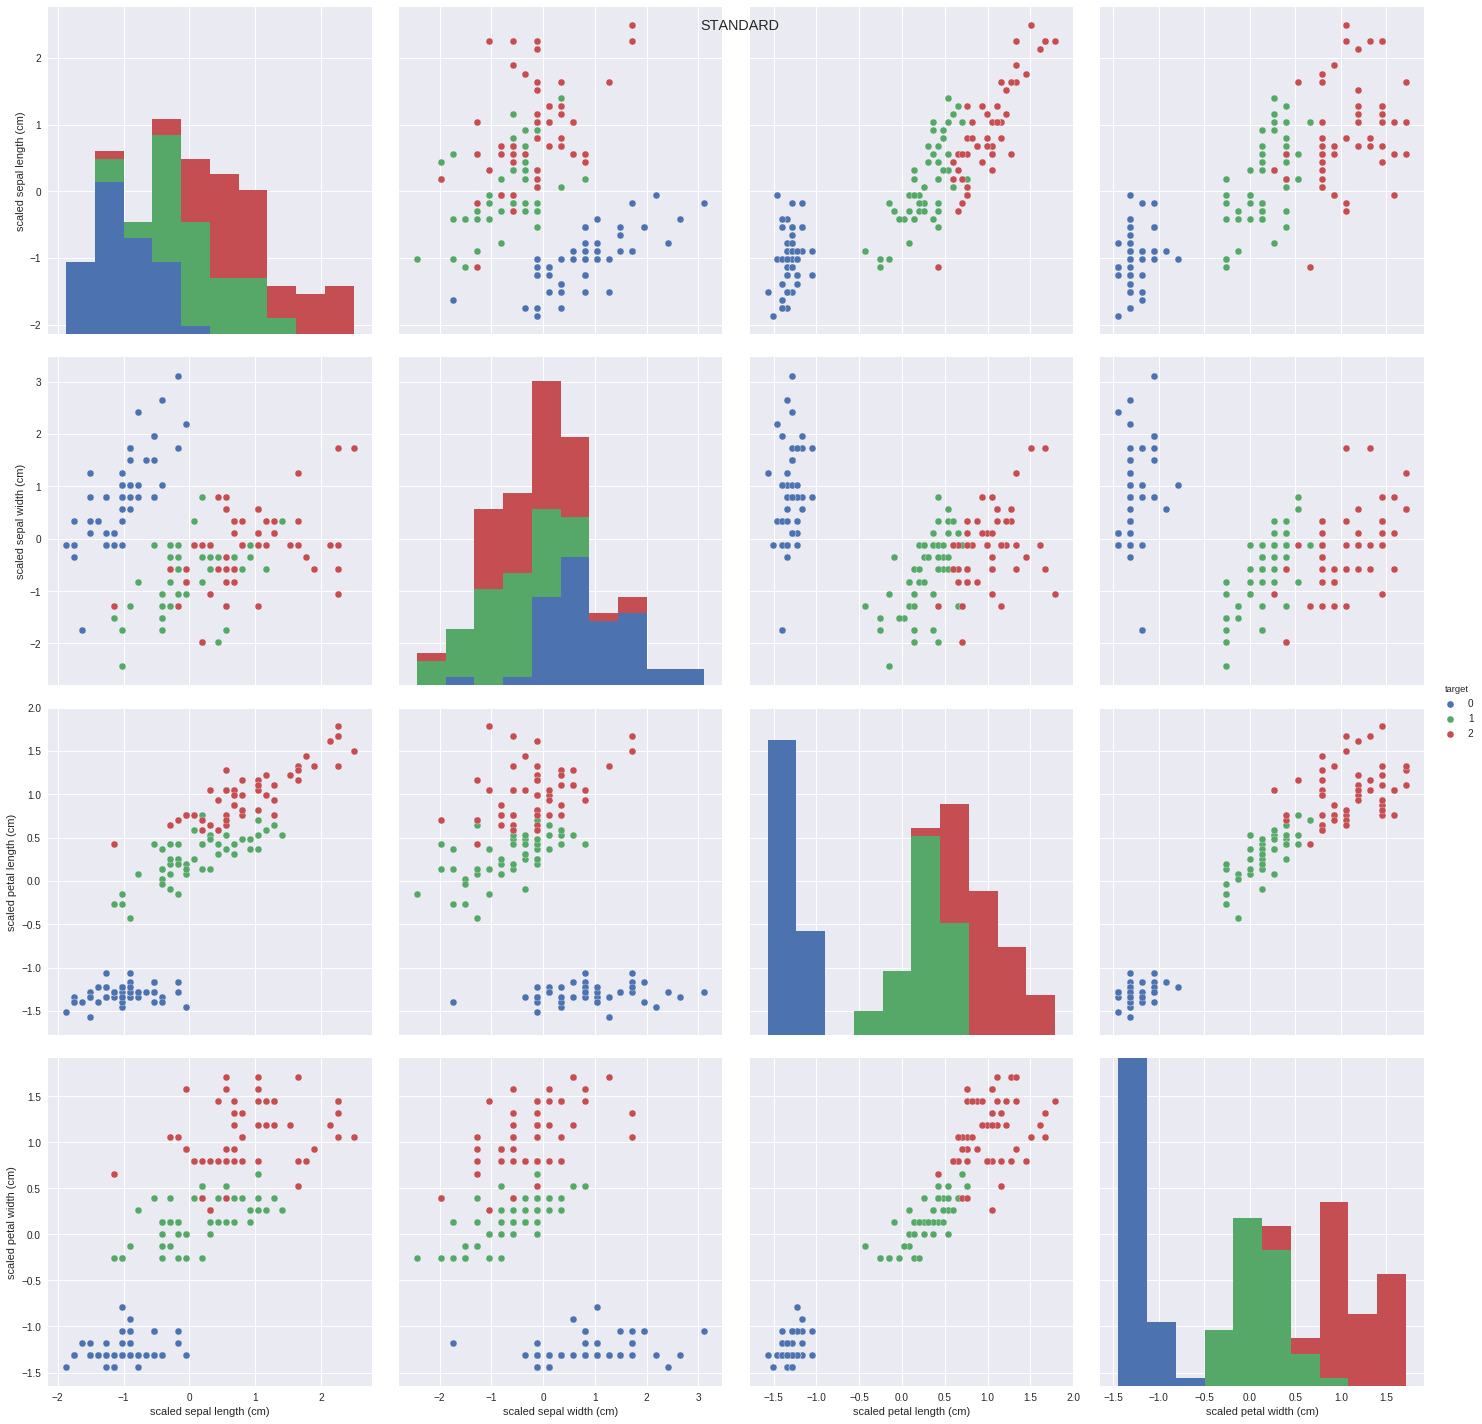

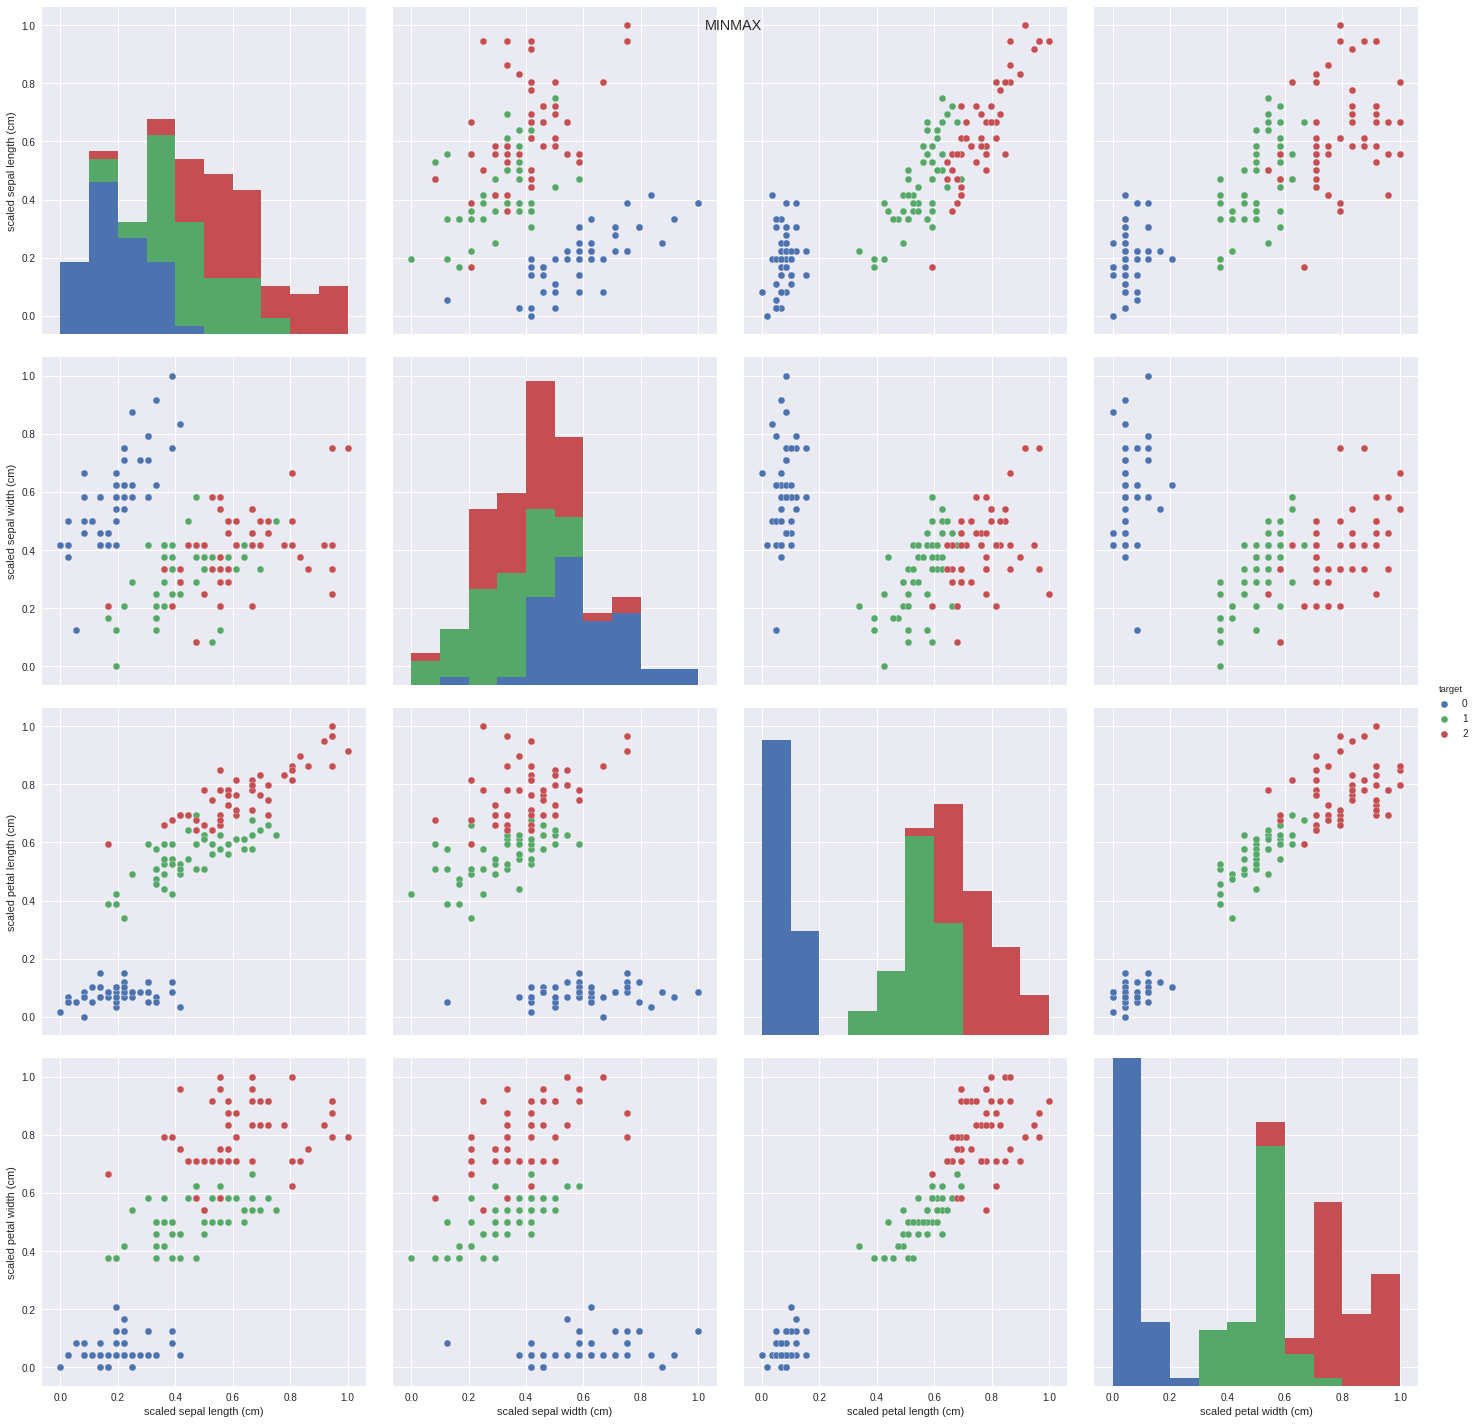

In [15]:
plt.show()

In [17]:
from sklearn.cluster import KMeans

kmeansNormal = KMeans(n_clusters=3, random_state=0).fit(df.drop("target", axis = 1))
kmeansStandard = KMeans(n_clusters=3, random_state=0).fit(features_standardScaled)
kmeansMinMax = KMeans(n_clusters=3, random_state=0).fit(features_minMaxScaled)

In [42]:
a = kmeansNormal.predict(df.drop("target", axis = 1))
b = kmeansStandard.predict(features_standardScaled)
c = kmeansMinMax.predict(features_minMaxScaled)
d = data.target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [37]:
np.matrix([a,b,c,d])

matrix([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
         2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
         2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
         0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
         2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
         2, 0, 0, 2, 2, 2, 0, 2, 2, 

In [50]:
aa = pd.concat([df.drop("target", axis = 1),pd.DataFrame(a)], axis=1)
bb = pd.concat([features_standardScaled,pd.DataFrame(b)], axis=1)
cc = pd.concat([features_minMaxScaled,pd.DataFrame(c)], axis=1) 

aa["pred"] = a
bb["pred"] = b
cc["pred"] = c

In [52]:
sns.pairplot(vars = data.feature_names, data=aa, hue="pred", size=5)
sns.plt.suptitle('NORMAL')
plt.savefig("normalPred.pdf")
sns.pairplot(vars = colnames, data=bb, hue="pred", size=5)
sns.plt.suptitle('STANDARD')
plt.savefig("standardPred.pdf")
sns.pairplot(vars = colnames, data=cc, hue="pred", size=5)
sns.plt.suptitle('MINMAX')
plt.savefig("minmaxPred.pdf")

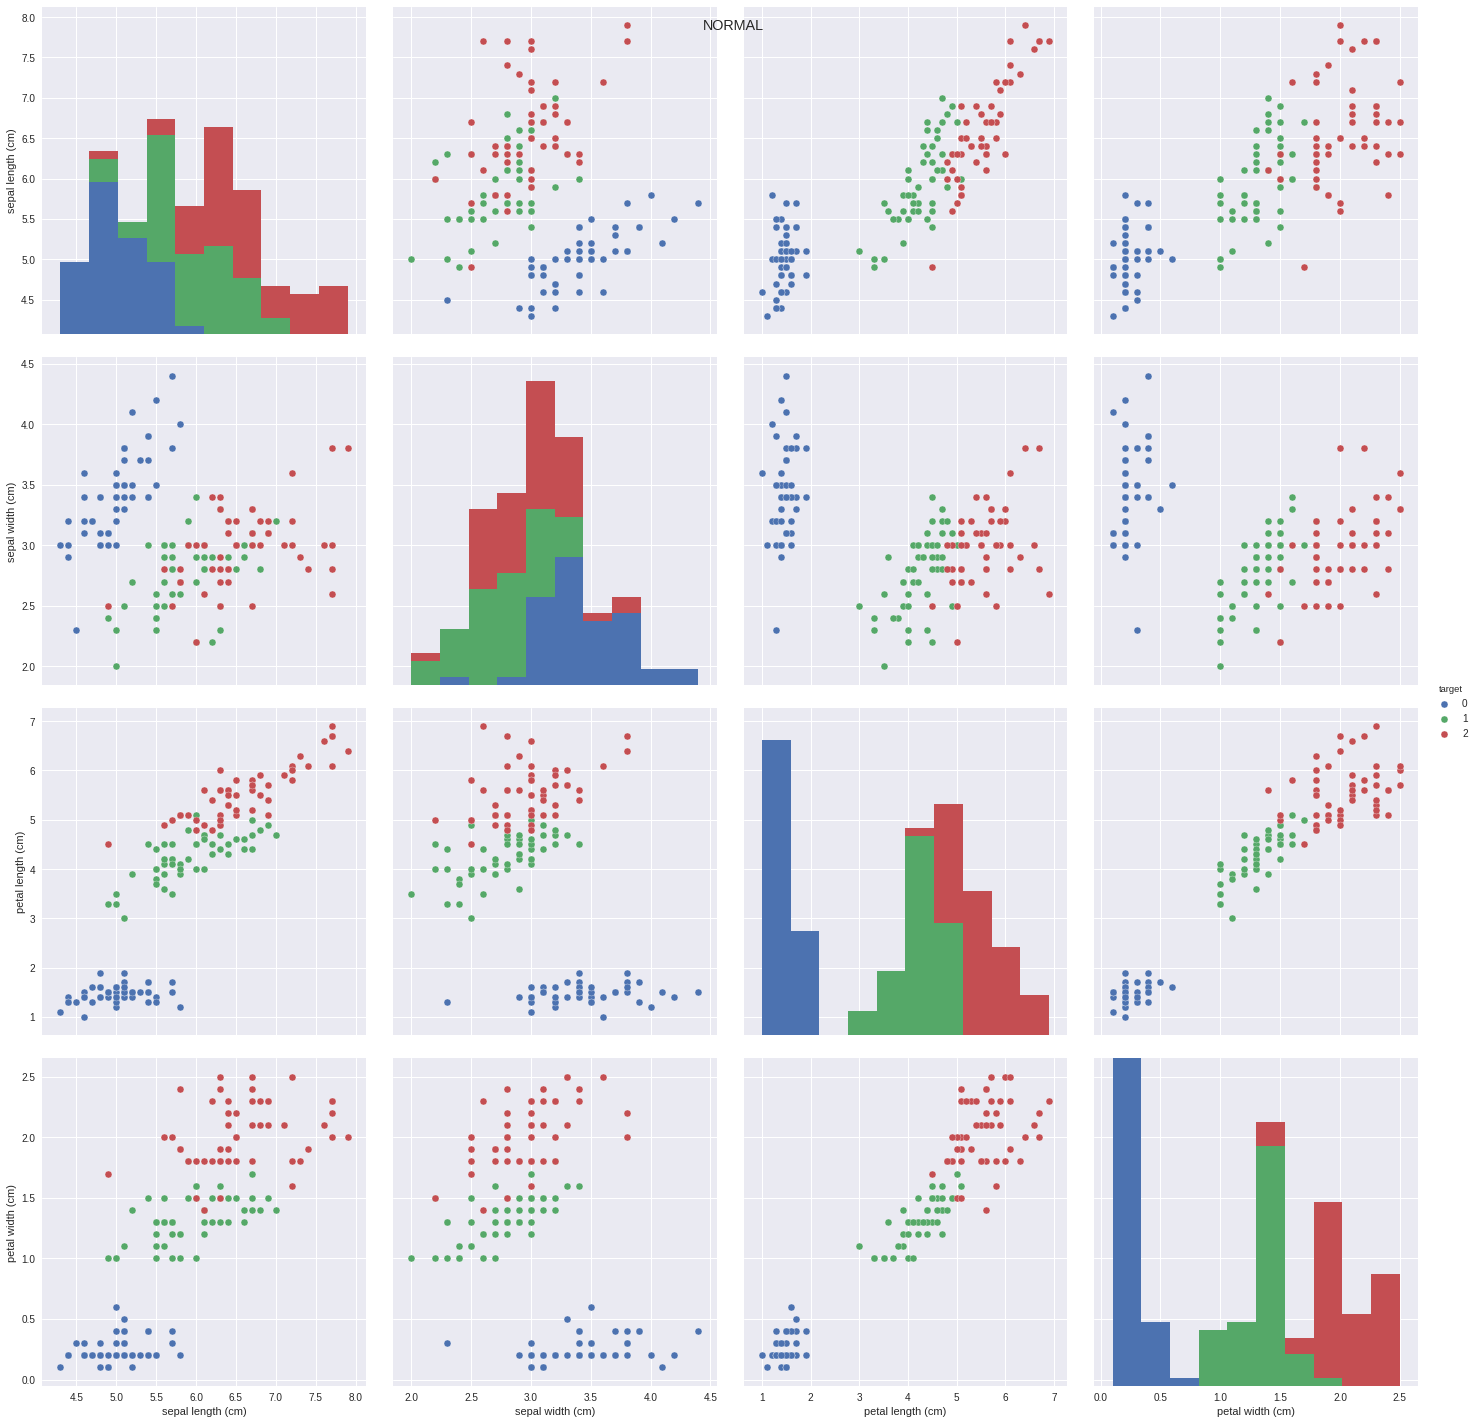

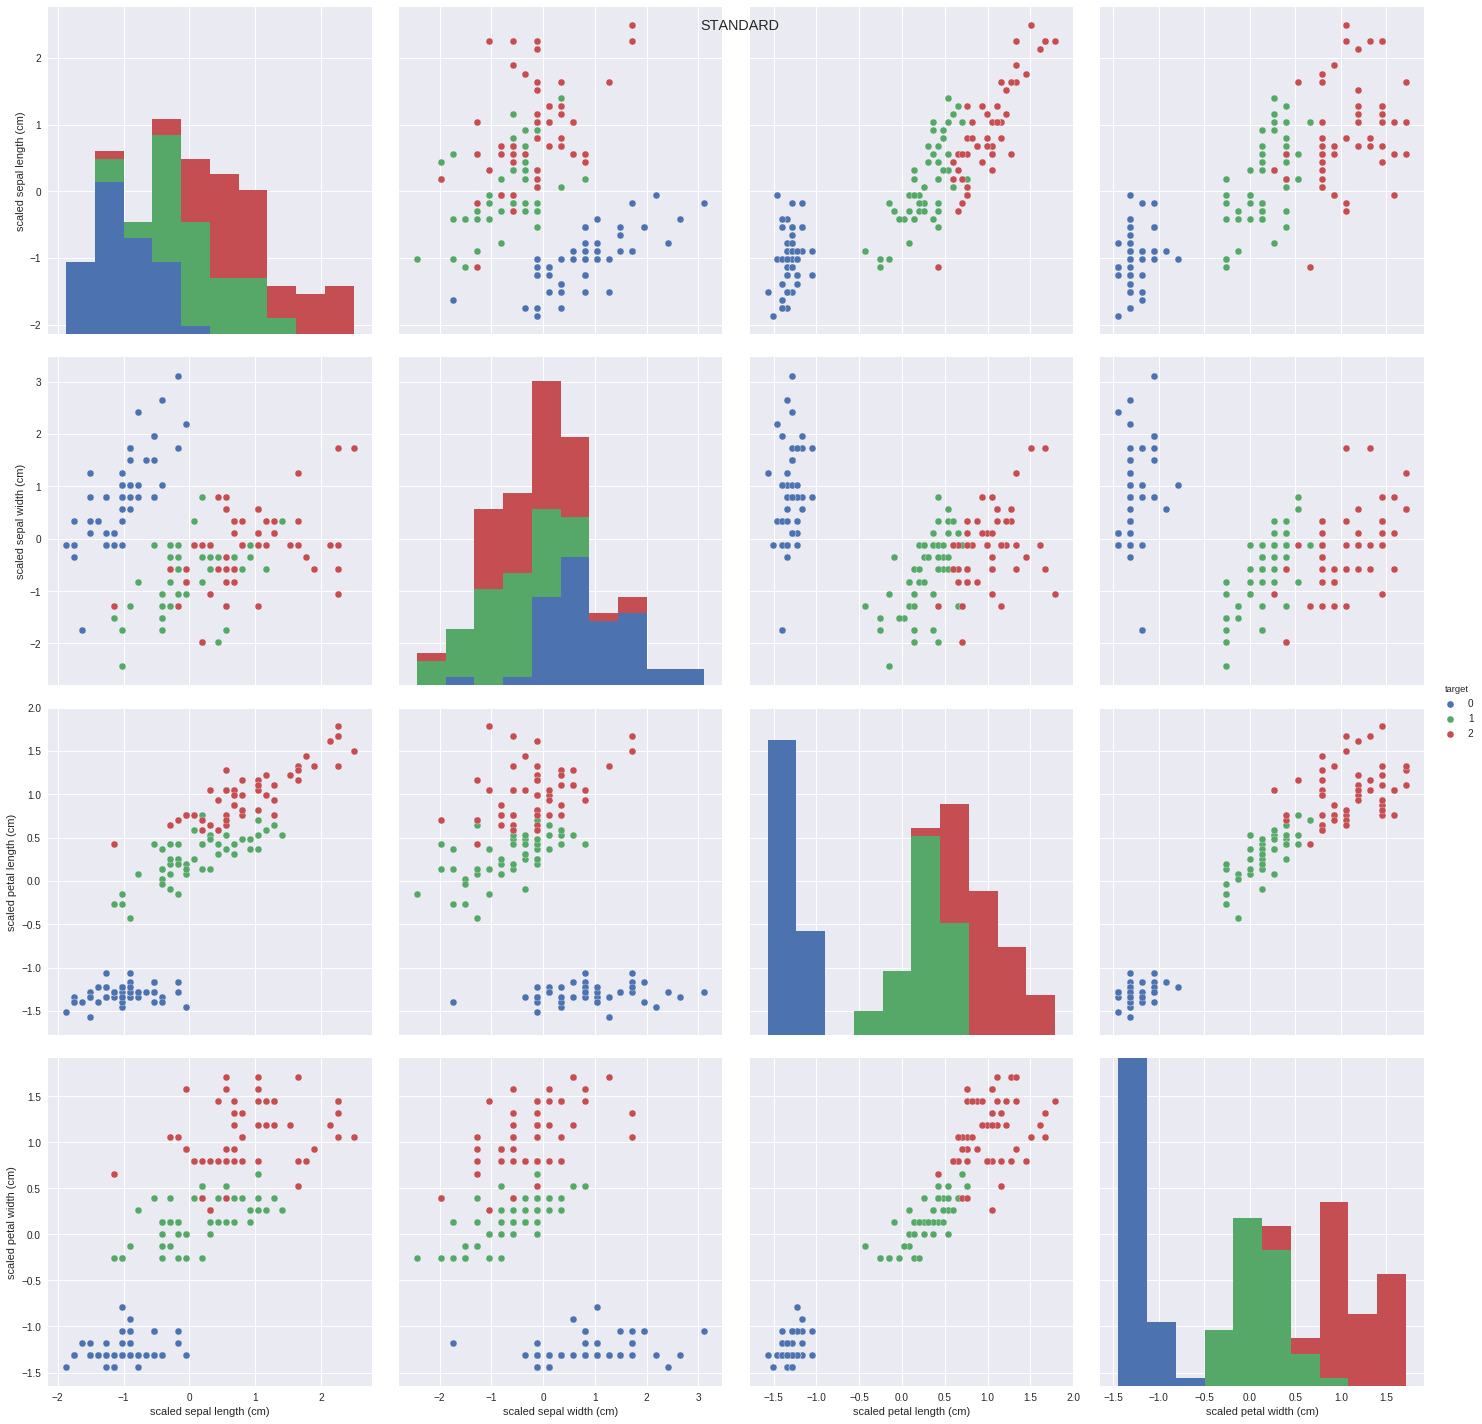

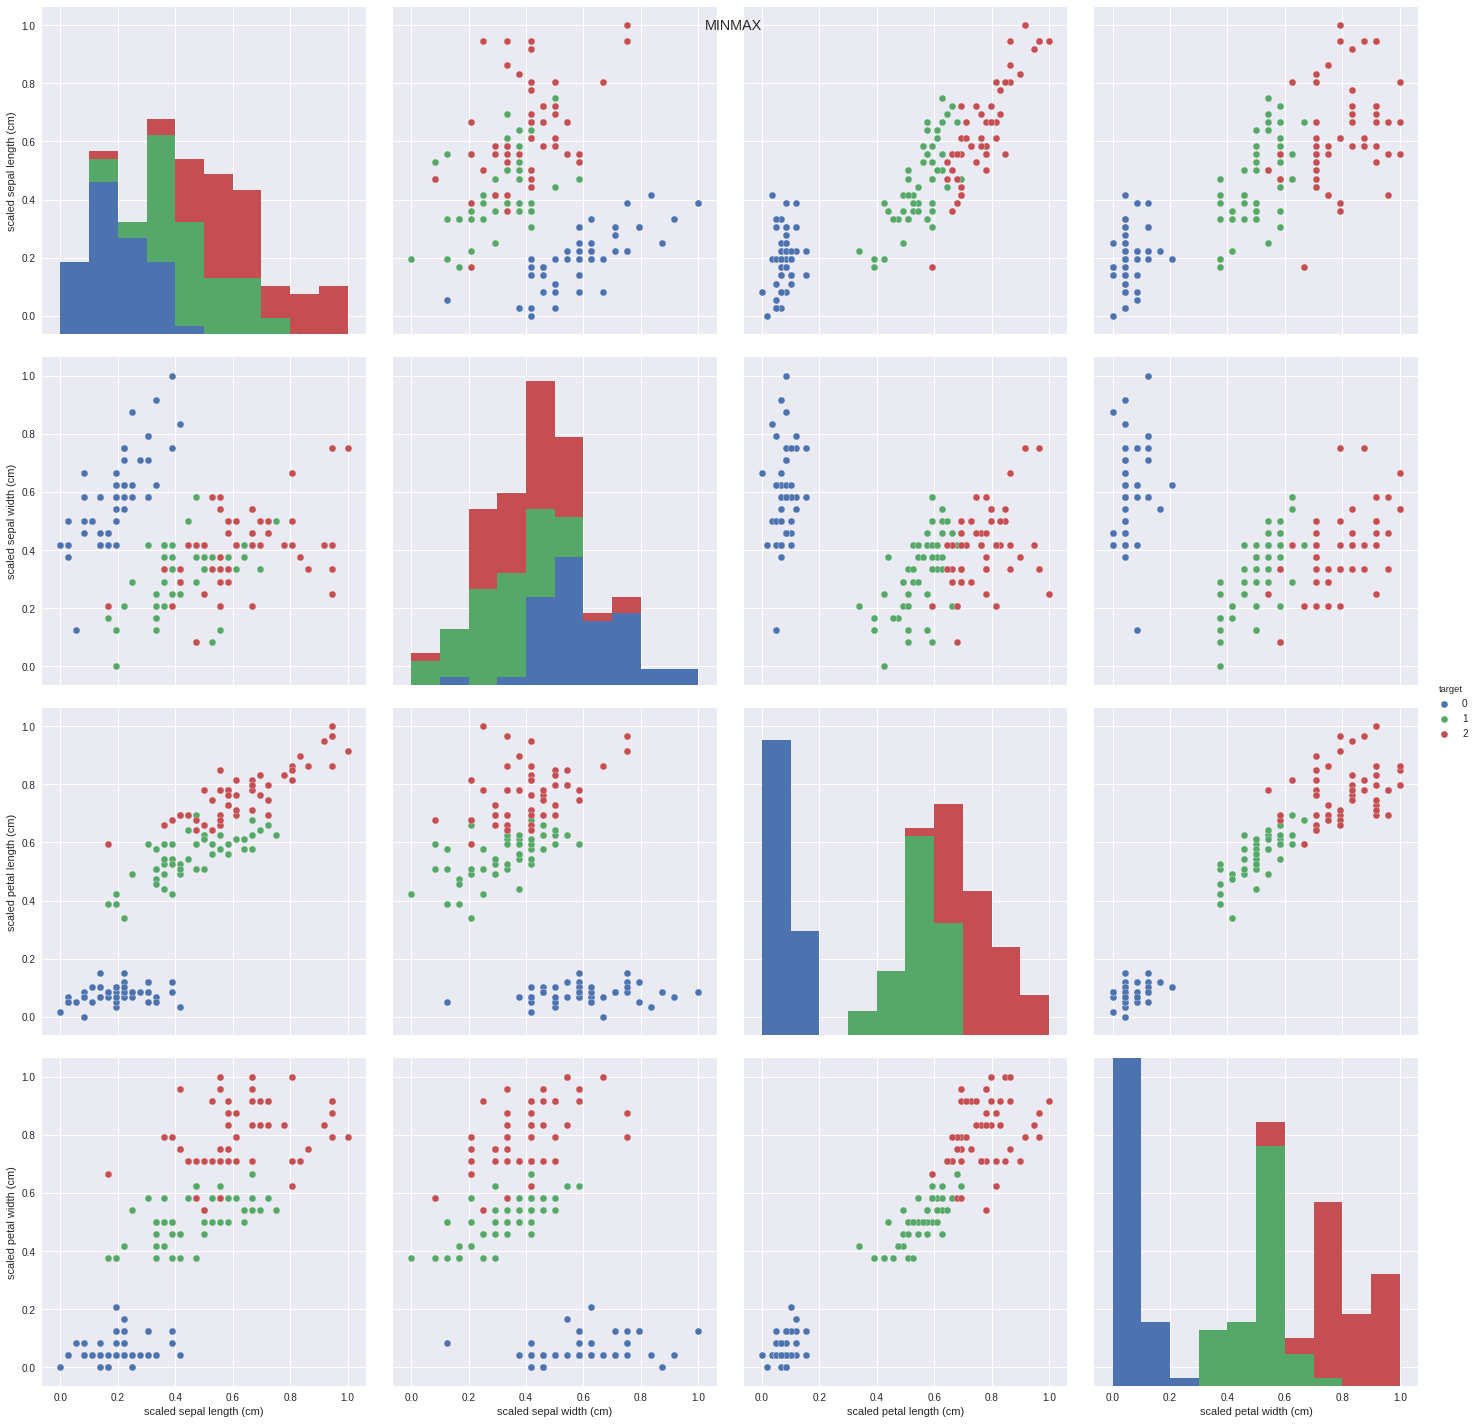

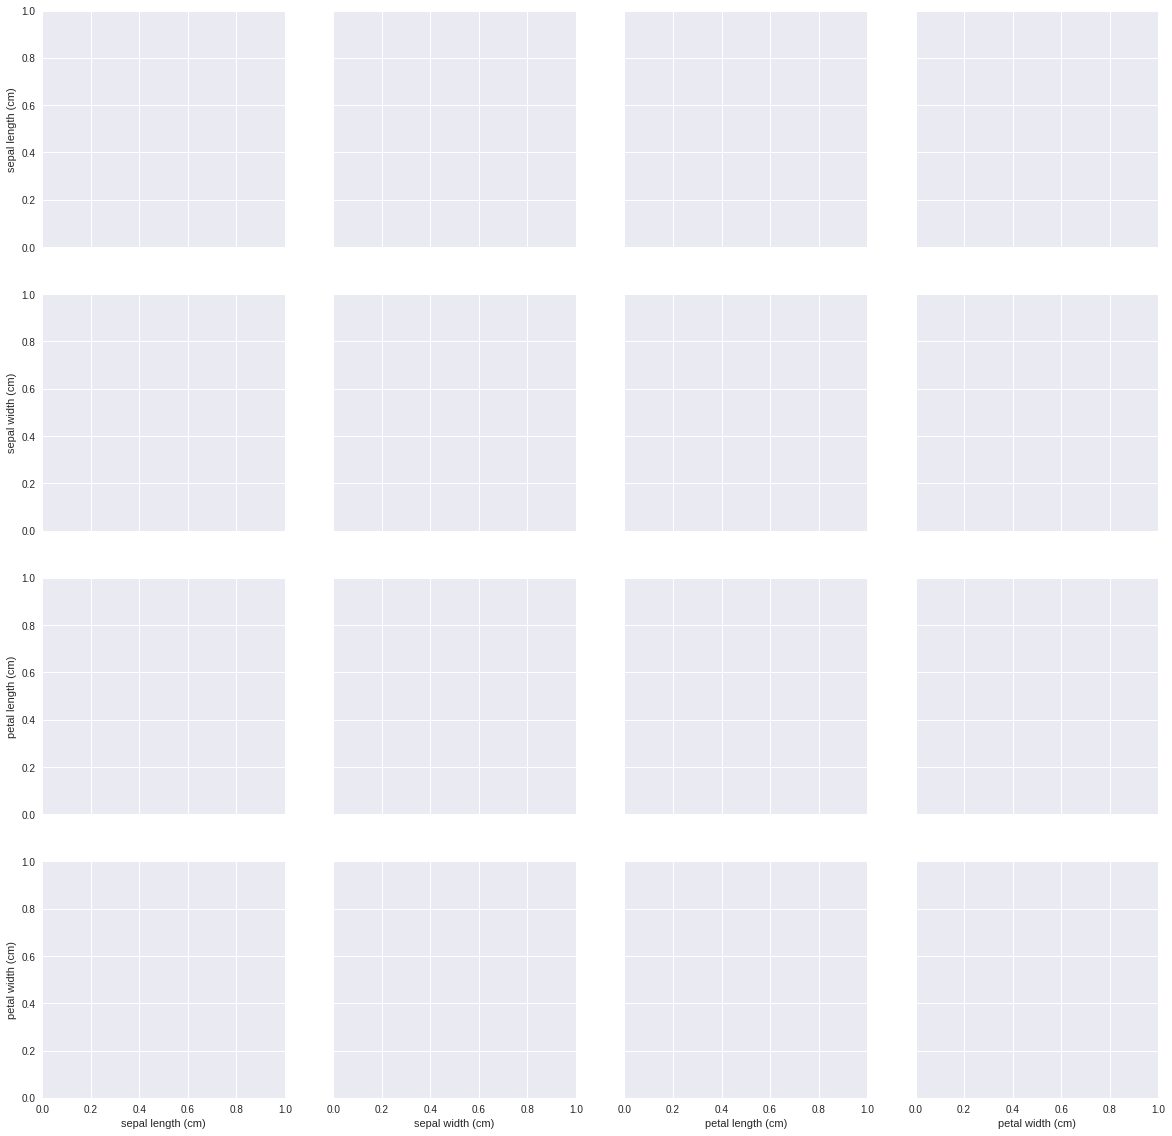

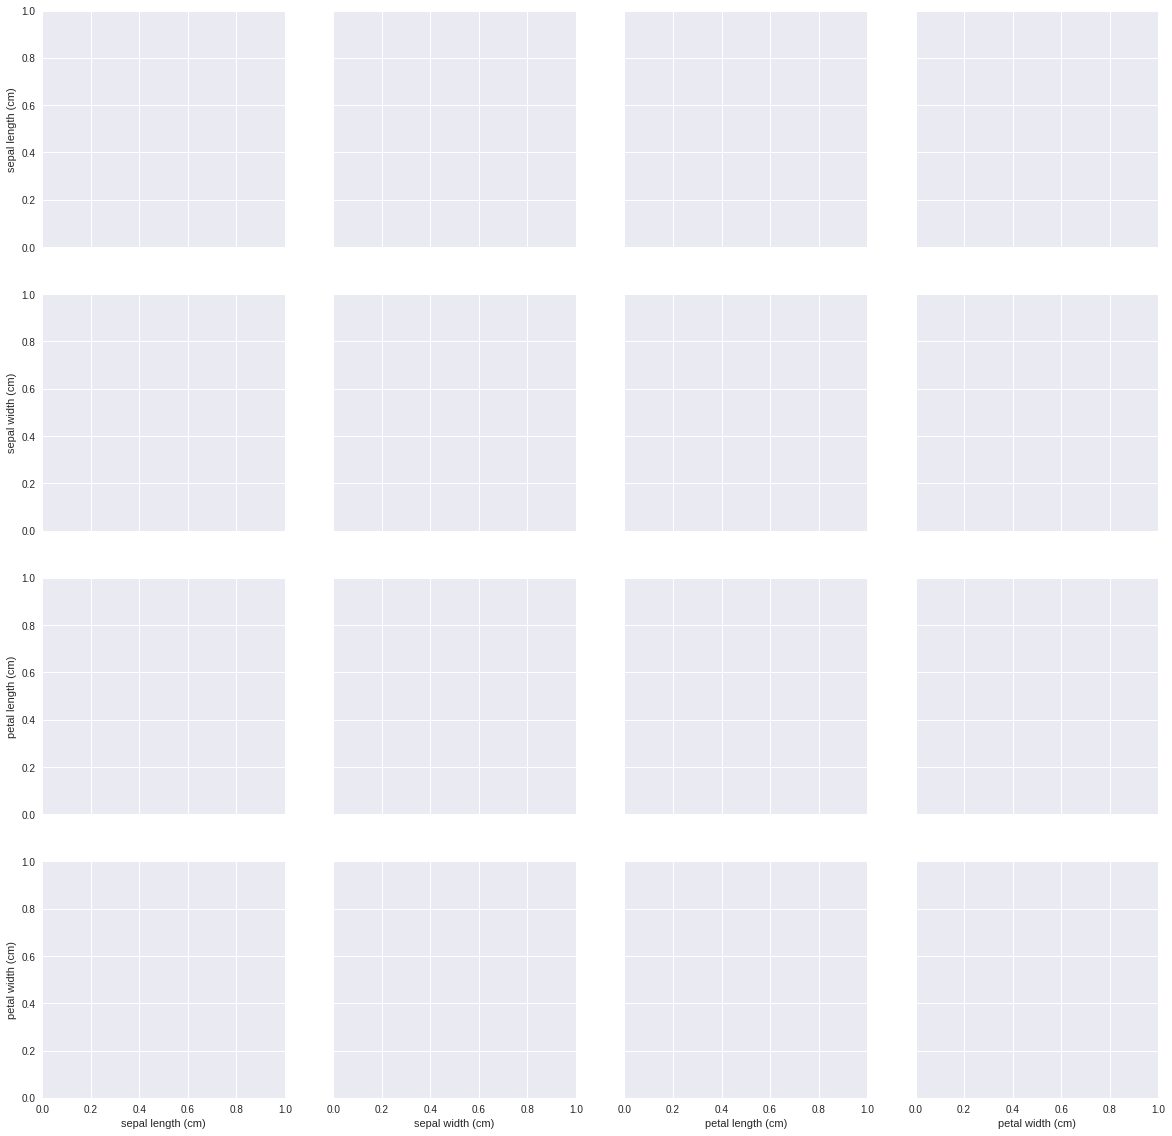

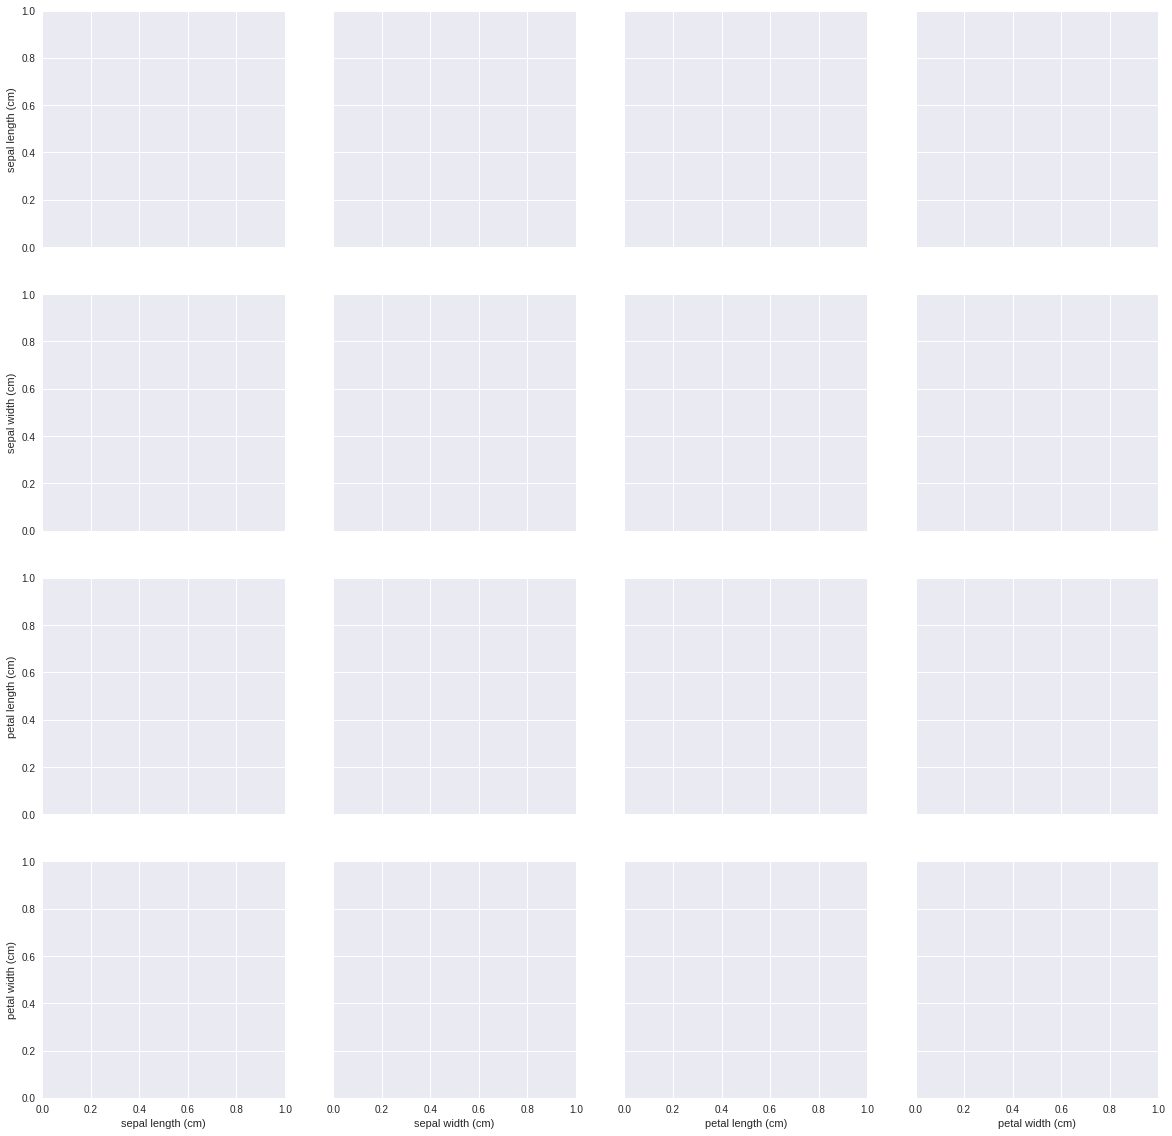

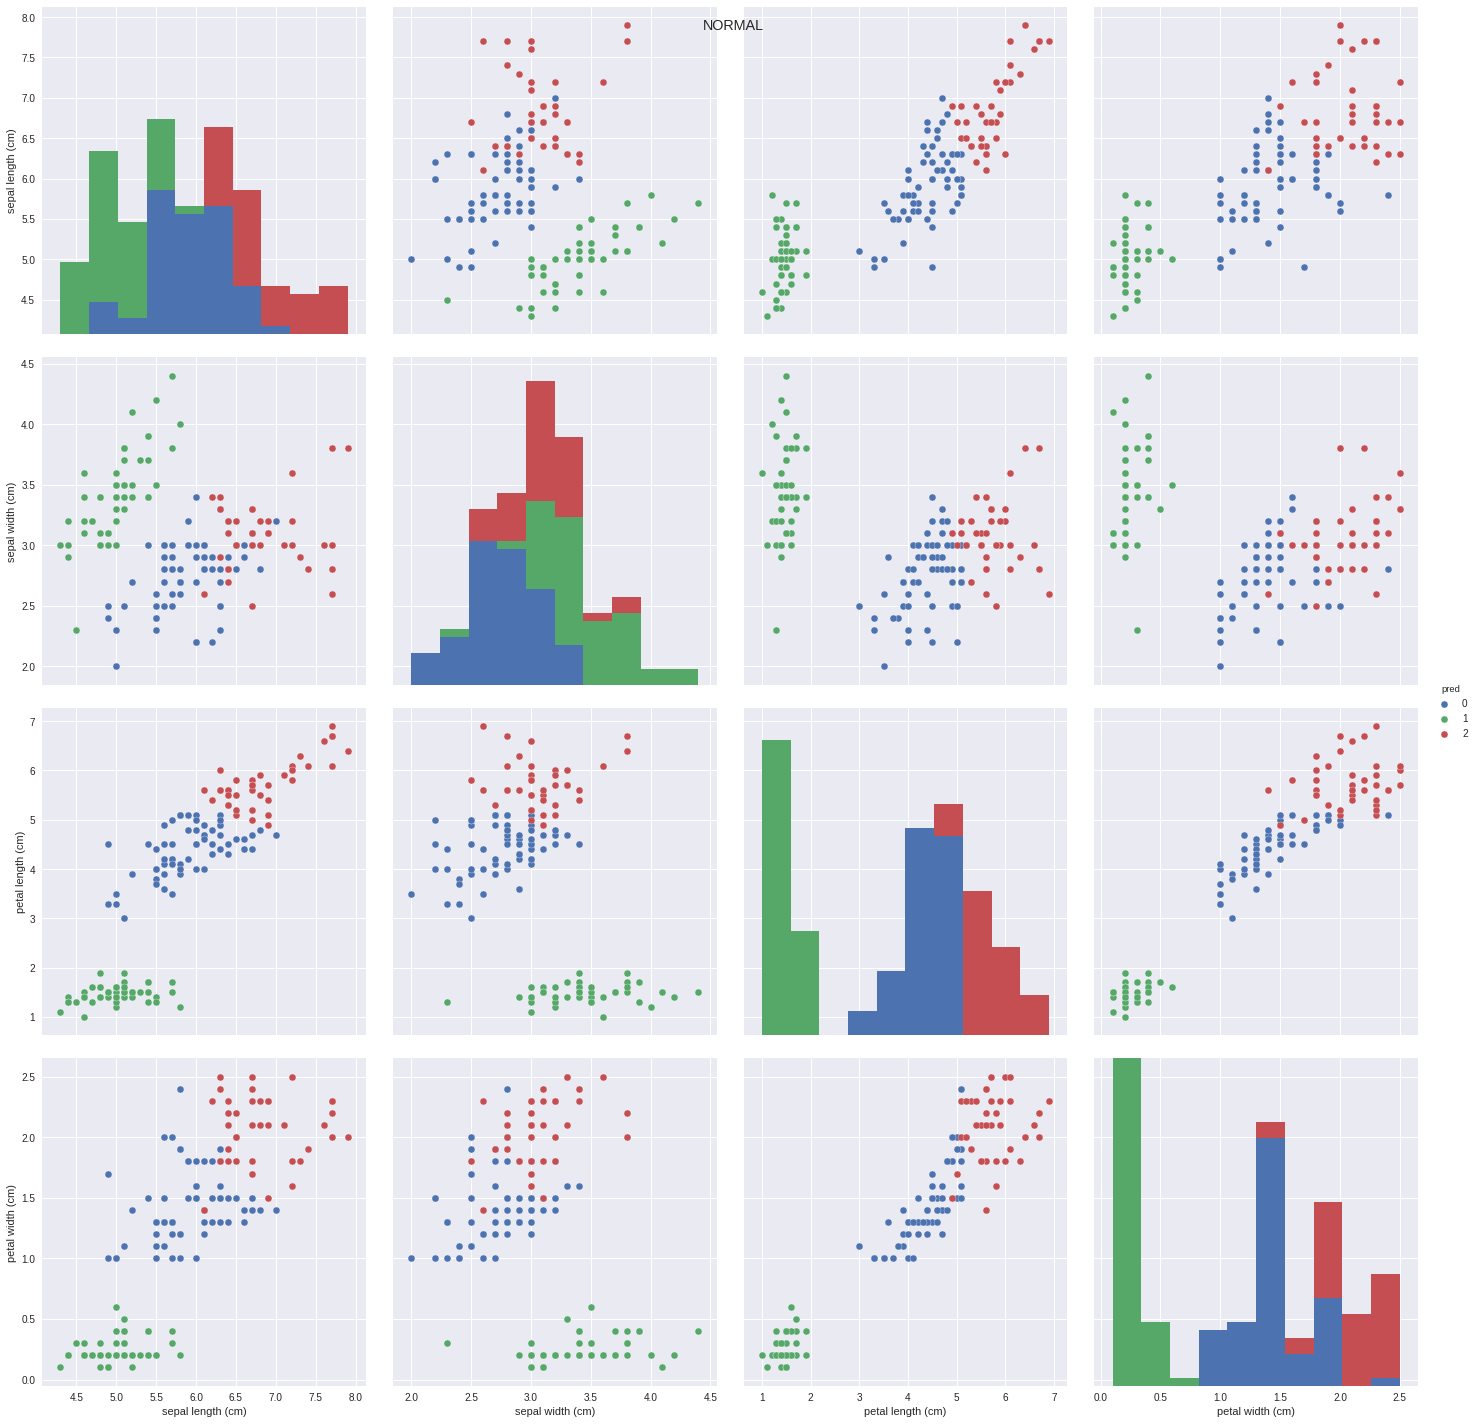

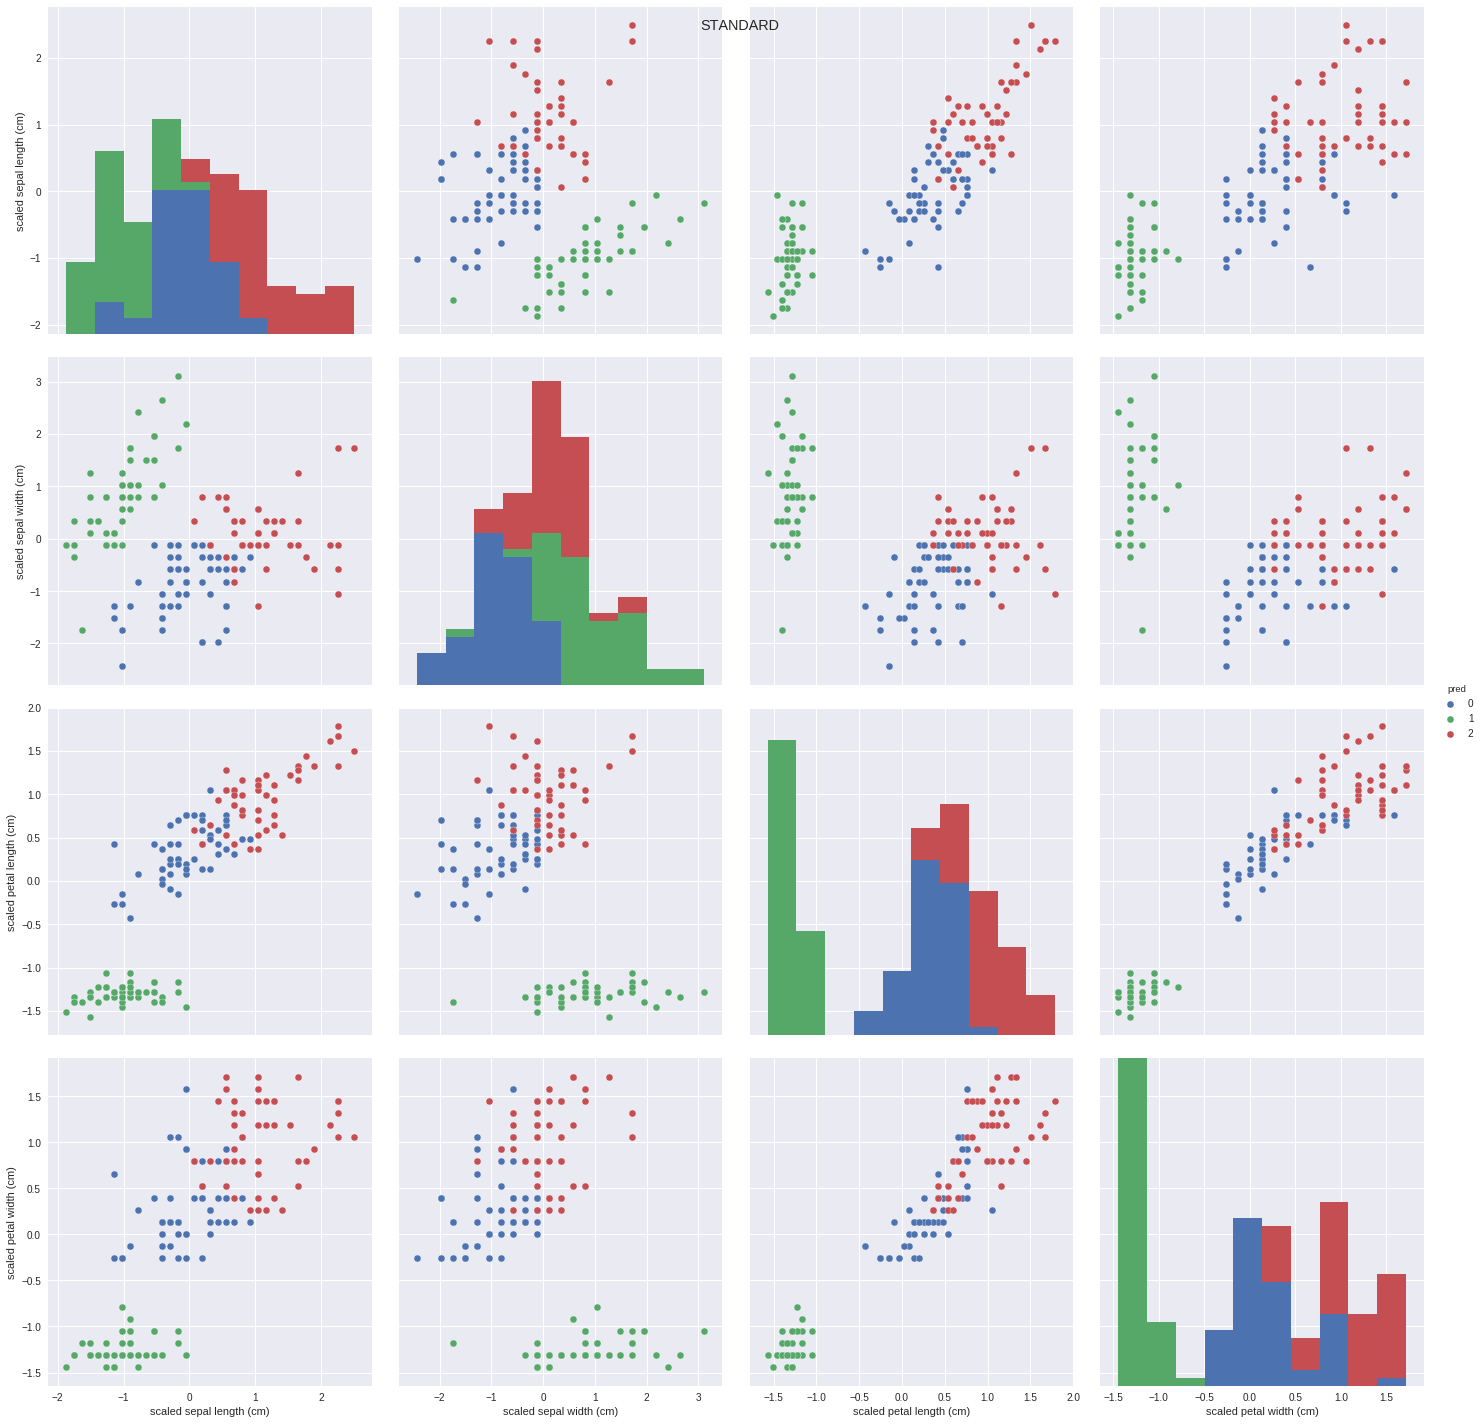

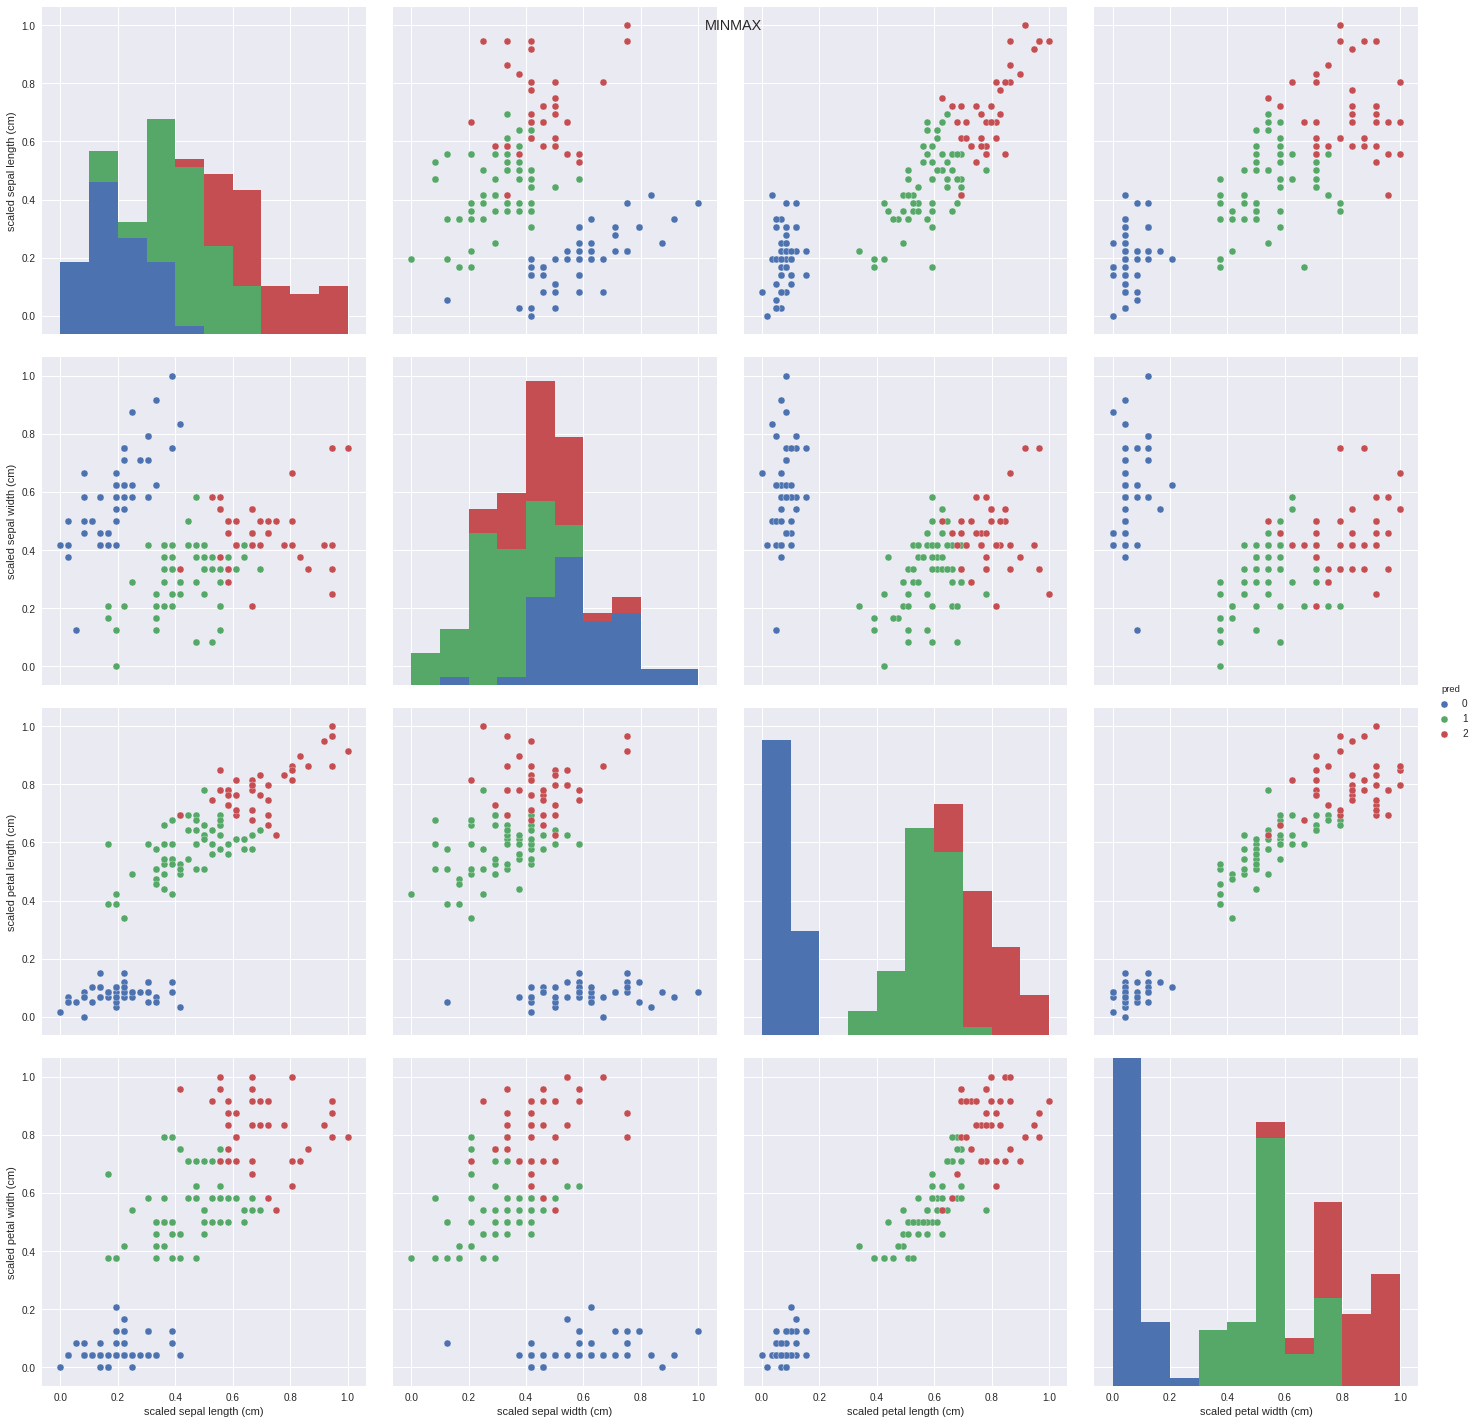

In [53]:
plt.show()

In [56]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [58]:
from sklearn_pandas import DataFrameMapper, cross_val_score